In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("../Dataset/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
dfx = df.dropna().copy()

In [9]:
dfx.shape

(20433, 10)

In [10]:
df.shape

(20640, 10)

In [11]:
def scatter(data, x, y, ax=None):
    if ax is None:
        ax = plt.gca()

    ax.scatter(data[x], data[y],)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

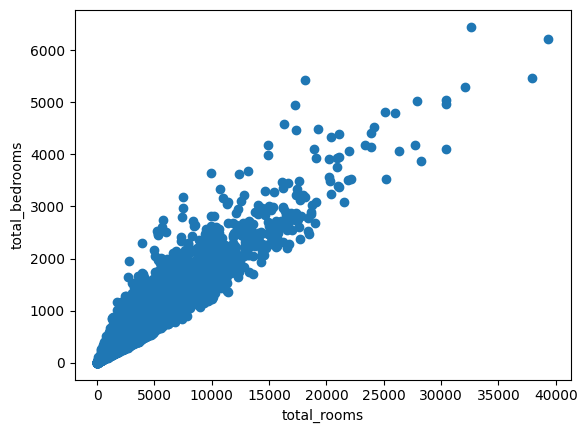

In [12]:
scatter(df, "total_rooms", "total_bedrooms")

**Splitting the data**

In [23]:
train, test = train_test_split(dfx, test_size = 0.3)

In [24]:
train.shape

(14303, 10)

In [25]:
test.shape

(6130, 10)

### Simple Linear Regression

General Linear Equationn for single feature

$$y = mx +c$$

In [26]:
model = LinearRegression()

In [27]:
x_train = train["total_rooms"]
y_train = train["total_bedrooms"]

x_test = test["total_rooms"]
y_test = test["total_bedrooms"]

In [28]:
def series_reshape(shape, *serieses):
    reshaped = []
    for series in serieses:
        reshaped.append(series.to_numpy().reshape(*shape))

    return reshaped

In [29]:
x_train , y_train, x_test, y_test = series_reshape((-1,1), x_train, y_train, x_test, y_test)

In [30]:
x_train.shape

(14303, 1)

## Training the model

In [31]:
# training the model with train data using fit method.
model.fit(x_train, y_train)

LinearRegression()

In [32]:
print("model coff_: ", model.coef_[0,0])
print("model intercept : ", model.intercept_[0])

model coff_:  0.1787019038061347
model intercept :  66.38659397349602


In [33]:
def lm_scatter(data, x, y, ax=None):
    if ax is None:
        ax = plt.gca()

    model = LinearRegression()

    ## first remove all the nan values
    _data_ = data[[x, y]].dropna()

    train_x, test_x, train_y, test_y = train_test_split(_data_[x], _data_[y], test_size=0.3)
    
    train_x, test_x, train_y, test_y = series_reshape((-1,1), train_x, test_x, train_y, test_x)

    
    model.fit(train_x, train_y)

    coff = model.coef_[0,0]
    intercept = model.intercept_[0]

    y_pred = coff*train_x + intercept
    ax.scatter(data[x], data[y])
    ax.plot(train_x, y_pred, color="red")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

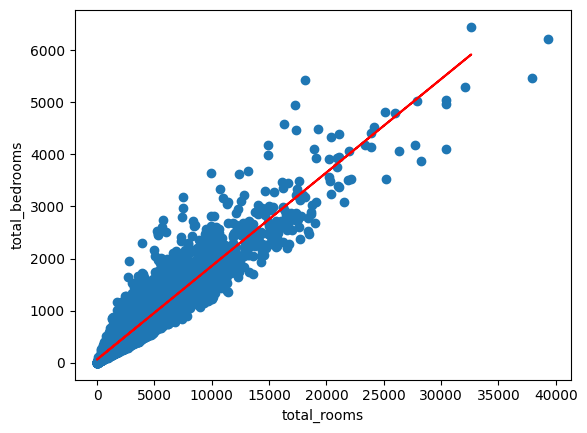

In [34]:
lm_scatter(dfx, "total_rooms", "total_bedrooms")

In [39]:
def lm_scatter2(data, x, y, ax=None):
    
    if ax is None:
        ax = plt.gca();
        
    model = LinearRegression()
    
    # first remove all the nan values
    _data_ = data[[x,y]].dropna()
    
    train_x, test_x, train_y, test_y = train_test_split(_data_[x], _data_[y], test_size=0.3)
    
    train_x, test_x, train_y, test_y = series_reshape((-1,1), train_x, test_x, train_y, test_y)
    
    model.fit(train_x, train_y)
    
    
    ax.scatter(data[x], data[y])
    
    ax.plot(test_x, model.predict(test_x), color='red')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    return ax

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

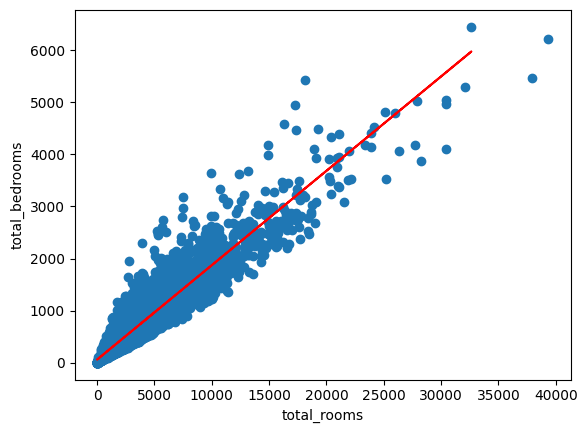

In [40]:
lm_scatter2(dfx, "total_rooms", "total_bedrooms")

In [41]:
item =2
y_pred= model.predict(x_test[item].reshape(-1,1))

print("original x_value: ", x_test[item])
print("original y_value: ", y_test[item])
print("pridicted y_value: ", y_pred[0])
print()

original x_value:  [2864.]
original y_value:  [487.]
pridicted y_value:  [578.18884647]

